<a href="https://colab.research.google.com/github/Britikoos/RUTUBE/blob/main/RecSys_RUTUBE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Перед нашей командой стояла задача создать рекомендательную систему видео на основе данных о просмотрах пользователей и метаданных видео.

Мы скачали все нужные нам библиотеки

In [3]:
!pip install pyarrow

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import seaborn as sns

Загрузили тестовые данные и разбили их на DataFrames

In [3]:
table = pq.read_table('/content/drive/MyDrive/videos.parquet')
df = table.to_pandas()


In [4]:
data1 = pd.read_csv('emotions.csv', delimiter=',')

data2 = pd.read_csv('small_player_starts_train.csv', delimiter=',')

data3 = data1.merge(data2, on=['item_id', 'user_id'], how='inner')

data3 =data3.merge(df, on ='item_id', how='inner' )

# Создание словарей для замены значений
type_mapping = {'pos_emotions': 0, 'neg_emotions': -1, 'v_top': 1}
emoji_mapping = {'v_top': 12, 'Like': 11, 'New_Fire': 10, 'Heart': 9, 'Happy_Star_glasses': 8,
 'Laugh': 7, 'Happy_glasses': 6, 'Dislike': 0, 'Sickness': 5, 'Angry': 4,
 'Gape': 3, 'Closed_mauth': 2, 'Crying': 1}

# Замена значений в столбцах 'type' и 'emoji'
data3['type'] = data3['type'].replace(type_mapping)
data3['emoji'] = data3['emoji'].replace(emoji_mapping)


data4=data3[['item_id', 'user_id', 'type', 'emoji', 'category_title']]


Как выглядят наши данные

In [62]:
data3

,date_x,user_id,item_id,type,emoji,date_y,watch_time,is_autorized,video_title,author_title,...,category_title,publicated,duration,channel_sub,tv_sub,ctr.CTR_10days_21_07,ctr.CTR_10days_01_08,ctr.CTR_10days_10_08,ctr.CTR_10days_21_08,time_ratio
0,2023-08-21 09:41:37+03:00,user_2142397,video_125790,1,12,2023-08-21 12:41:26+03:00,181,1,Обалденная ЗАКУСКА ИЗ КАБАЧКОВ за 10 минут. С ...,Шеф Дмитрий,...,Кулинария,2023-08-20 11:26:19+03:00,183467,6292,0,NaN,NaN,NaN,0.142857,0.986553
1,2023-08-21 01:52:16+03:00,user_718921,video_125790,1,12,2023-08-21 04:51:49+03:00,11,1,Обалденная ЗАКУСКА ИЗ КАБАЧКОВ за 10 минут. С ...,Шеф Дмитрий,...,Кулинария,2023-08-20 11:26:19+03:00,183467,6292,0,NaN,NaN,NaN,0.142857,0.059956
2,2023-08-21 10:59:20+03:00,user_21944136,video_125790,1,12,2023-08-21 13:57:29+03:00,181,1,Обалденная ЗАКУСКА ИЗ КАБАЧКОВ за 10 минут. С ...,Шеф Дмитрий,...,Кулинария,2023-08-20 11:26:19+03:00,183467,6292,0,NaN,NaN,NaN,0.142857,0.986553
3,2023-08-21 12:50:33+03:00,user_24338405,video_125790,1,12,2023-08-21 15:48:33+03:00,181,1,Обалденная ЗАКУСКА ИЗ КАБАЧКОВ за 10 минут. С ...,Шеф Дмитрий,...,Кулинария,2023-08-20 11:26:19+03:00,183467,6292,0,NaN,NaN,NaN,0.142857,0.986553
4,2023-08-21 16:19:43+03:00,user_26889771,video_125790,1,12,2023-08-21 19:22:40+03:00,11,1,Обалденная ЗАКУСКА ИЗ КАБАЧКОВ за 10 минут. С ...,Шеф Дмитрий,...,Кулинария,2023-08-20 11:26:19+03:00,183467,6292,0,NaN,NaN,NaN,0.142857,0.059956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22681,2023-08-21 13:07:43+03:00,user_13922408,video_1992773,-1,0,2023-08-21 16:07:29+03:00,23,1,Форсаж - все части по порядку 2001 - 2021 от GTV,Goodwin о Кино,...,Фильмы,2021-06-27 21:19:56+03:00,792000,193,0,0.050725,0.027848,0.019544,0.014888,0.029040
22682,2023-08-21 17:14:36+03:00,user_2160676,video_152144,0,11,2023-08-21 20:46:51+03:00,42,1,Сколько весят муларды в 2 месяца// Отзывы о му...,Строительные Лабиринты ❤,...,Разное,2023-08-12 10:45:32+03:00,370266,1,0,0.000000,0.000000,0.000000,0.000000,0.113432
22683,2023-08-21 17:14:36+03:00,user_2160676,video_152144,0,11,2023-08-21 20:09:05+03:00,362,1,Сколько весят муларды в 2 месяца// Отзывы о му...,Строительные Лабиринты ❤,...,Разное,2023-08-12 10:45:32+03:00,370266,1,0,0.000000,0.000000,0.000000,0.000000,0.977676
22684,2023-08-21 07:05:23+03:00,user_11644428,video_706182,0,11,2023-08-21 10:05:16+03:00,712,1,Манчестер Сити - Севилья. Обзор финального мат...,МАТЧ!,...,Спорт,2023-08-17 00:42:17+03:00,796054,31571,0,NaN,NaN,NaN,0.026812,0.894412


Выведем все категории которые есть

In [82]:
X= data4.category_title.unique()
X.size-1
X

array(['Кулинария', 'Образование', 'Развлечения', 'Интервью', 'Видеоигры',
       'Телепередачи', 'Сериалы', 'Сад и огород', 'Юмор', 'Спорт',
       'Лайфстайл', 'Искусство', 'Бизнес и предпринимательство', 'Музыка',
       'Фильмы', 'Недвижимость', 'Технологии и интернет', 'Разное',
       'Эзотерика', 'Мультфильмы', 'Авто-мото', 'Аудиокниги', 'Детям',
       'Техника и оборудование', 'Хобби', 'Аниме', 'Психология',
       'Здоровье', 'Животные', 'Наука', 'Обзоры и распаковки товаров',
       'Лайфхаки', 'Природа', 'Дизайн', 'Путешествия',
       'Строительство и ремонт', 'Охота и рыбалка', 'Красота', 'Аудио',
       'Люди и блоги'], dtype=object)

Построим корреляционную матрицу, чтобы найти зависисмости категорий друг ото друга

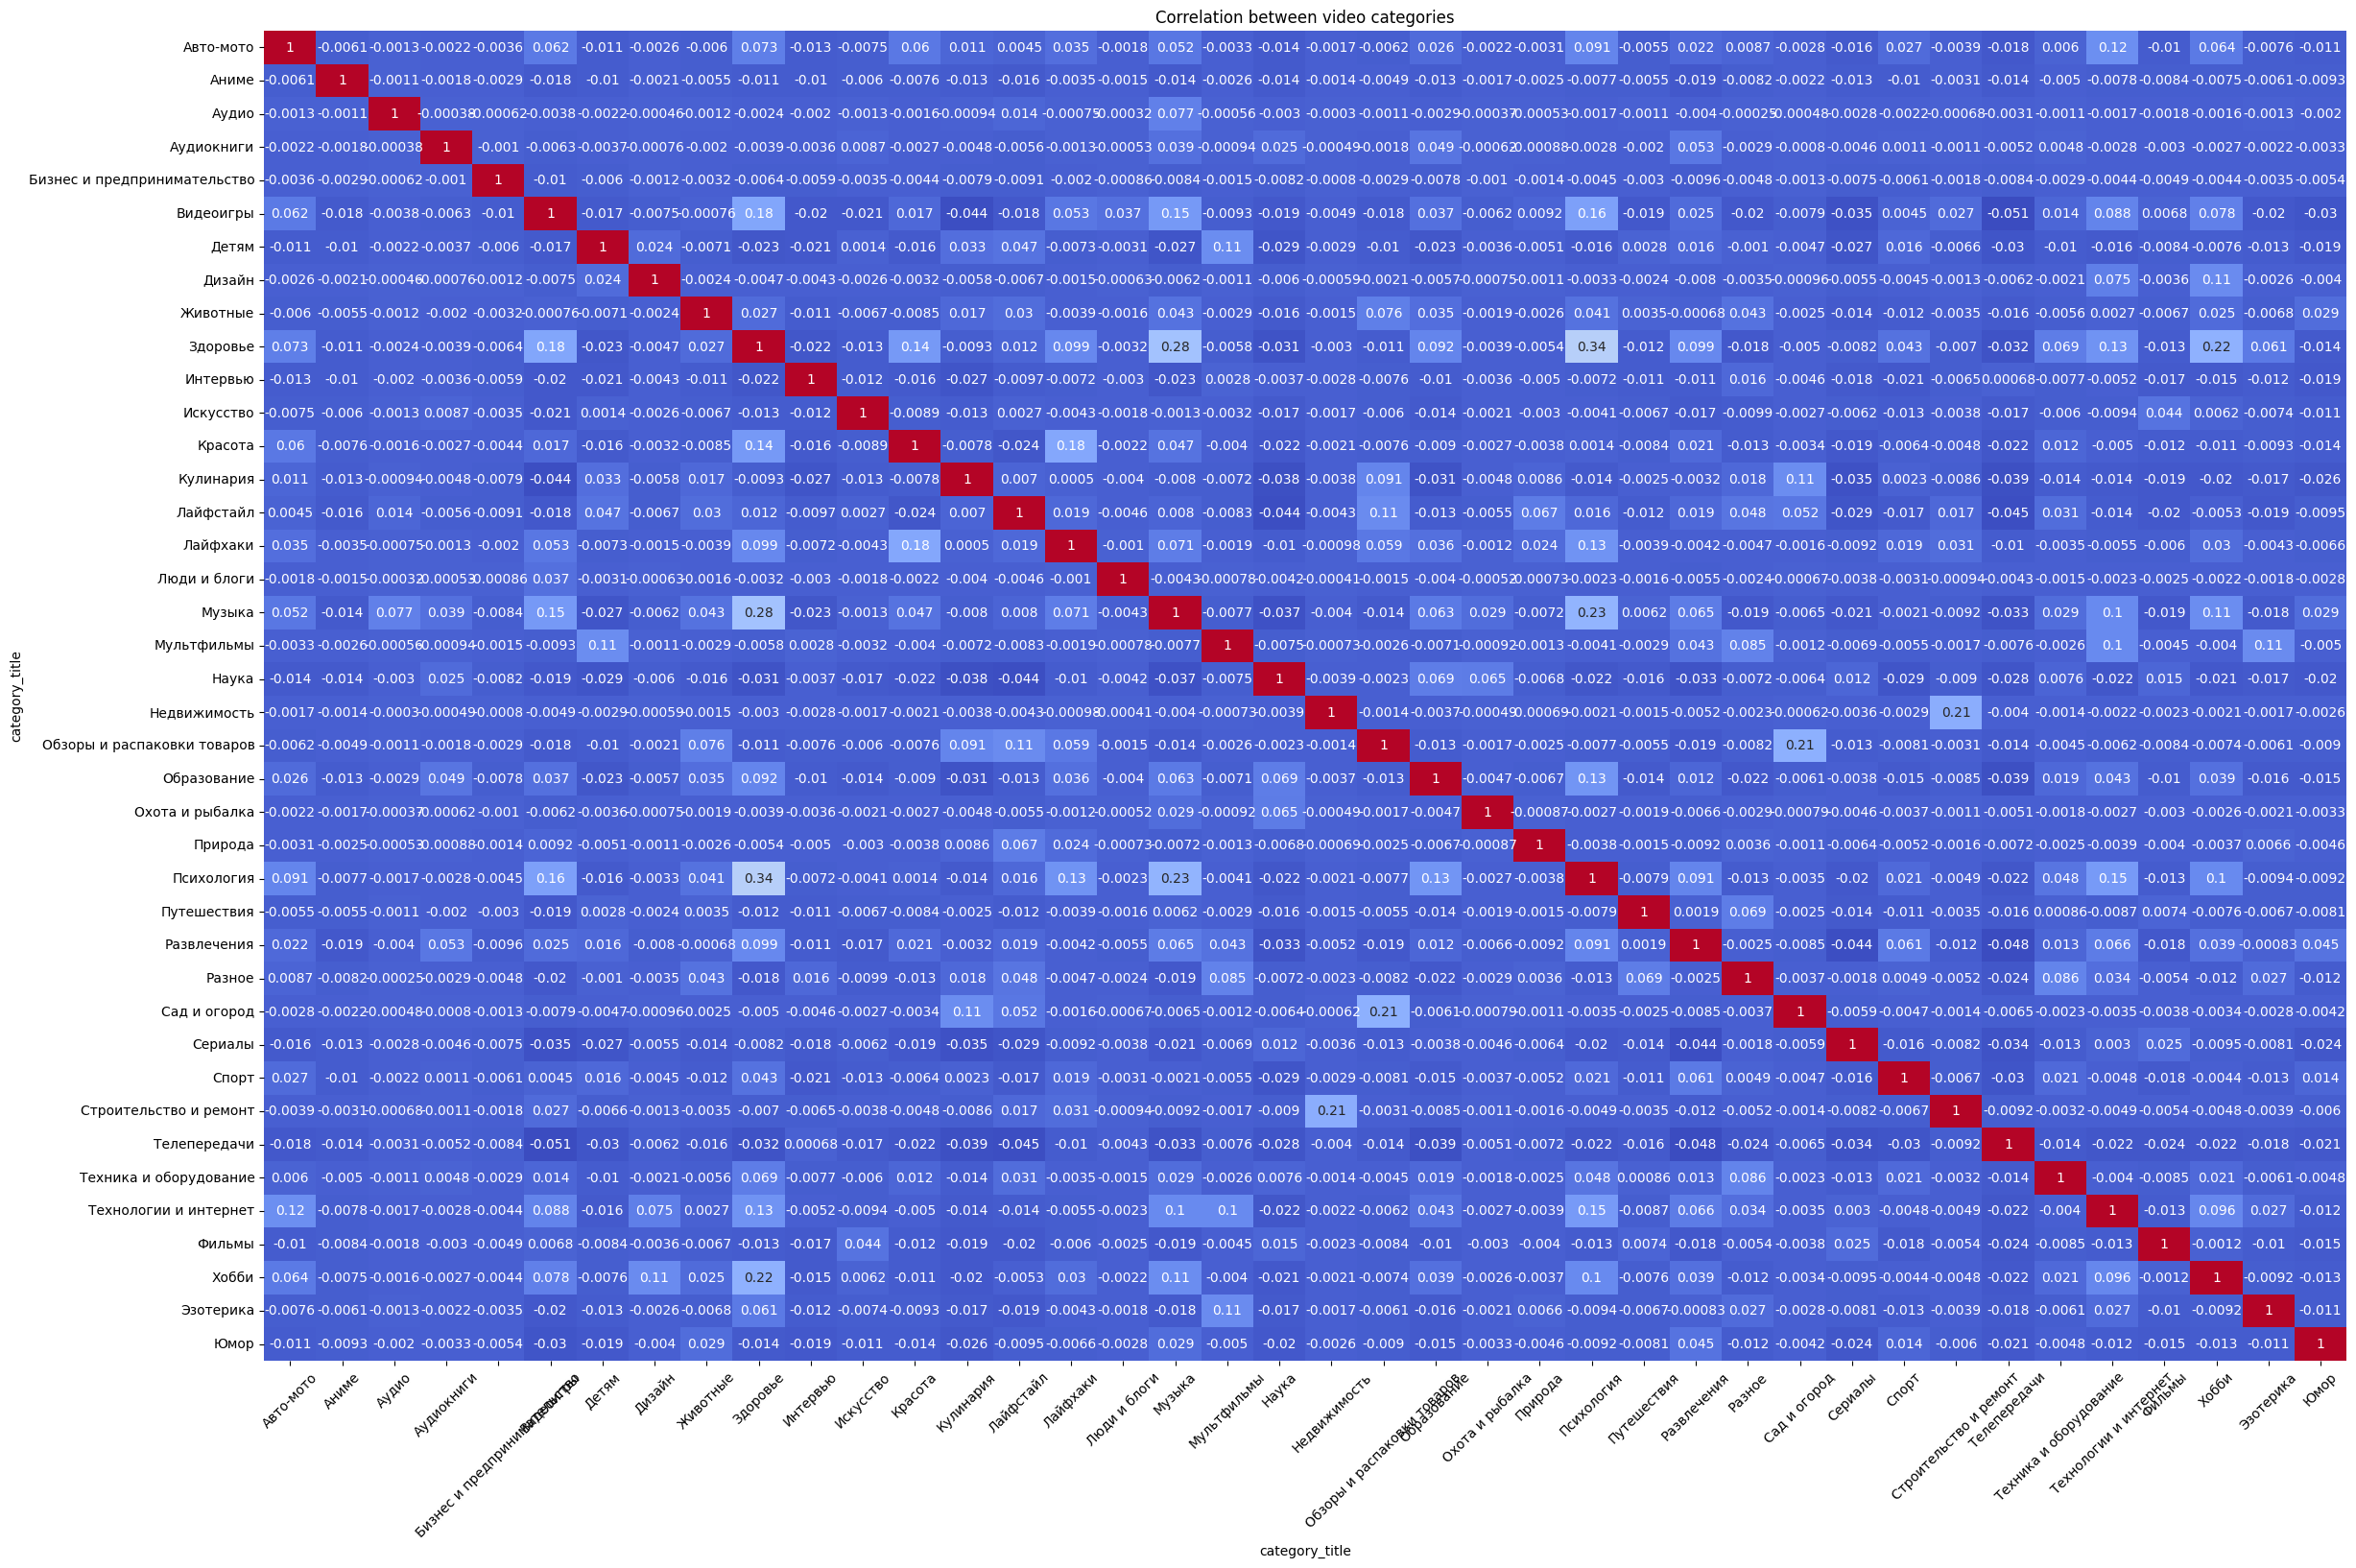

In [84]:
data = data3

ratings = data.pivot_table(index='user_id', columns='category_title', values='time_ratio', fill_value=0)
correlation = ratings.corr()

plt.figure(figsize=(28, 18))
sns.heatmap(correlation, annot=True, cmap='coolwarm', cbar=False)
plt.title('Correlation between video categories')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()



Рассмотрим как выглядит решение

In [31]:
submission = pd.read_csv("sample_submission.csv",  delimiter=',')

data3['time_ratio'] = (data3['watch_time'] * 1000)/ data3['duration']
#data3['time_ratio'] = data3['time_ratio'].apply(lambda x: round(x, 2)).clip(0, 1)

submission

,user_id,recs
0,user_26511551,"['video_0', 'video_0', 'video_0', 'video_0', '..."
1,user_29194819,"['video_0', 'video_0', 'video_0', 'video_0', '..."
2,user_29734049,"['video_0', 'video_0', 'video_0', 'video_0', '..."
3,user_955460,"['video_0', 'video_0', 'video_0', 'video_0', '..."
4,user_7065521,"['video_0', 'video_0', 'video_0', 'video_0', '..."
...,...,...
97235,user_29281681,"['video_0', 'video_0', 'video_0', 'video_0', '..."
97236,user_3912848,"['video_0', 'video_0', 'video_0', 'video_0', '..."
97237,user_28389099,"['video_0', 'video_0', 'video_0', 'video_0', '..."
97238,user_18951296,"['video_0', 'video_0', 'video_0', 'video_0', '..."


Приведем к похожим выводам

In [85]:
criteria = data3[['user_id', 'type', 'emoji', 'time_ratio']]

most_popular = list(data3.item_id.value_counts()[:10].to_frame().index)

for user in data3.user_id[:20]:
 cur_categories =[]
 cur_categories.extend(data3[(data3['user_id'] == user) & (data3['time_ratio'] > 0.5) & ((data3['type'] >= 0) | data3['emoji'].between(6, 11))].category_title)
 sorted_correlations = set()

 for category in cur_categories:
    filtered_correlation = correlation[category]
    sorted_correlation = filtered_correlation.sort_values(ascending=False).index.tolist()[:3]

    for item in sorted_correlation:
     sorted_correlations.add(item)
 if(len(sorted_correlations) == 0):
  print(most_popular)
 else:
  popular_videos = data3[data3['category_title'].isin(sorted_correlations)]
  #print(list(popular_videos['video_title'].value_counts()[:10].to_frame().index))
  print(np.random.choice(list(popular_videos['item_id'].value_counts()[:10].to_frame().index), size=10, replace=False))

['video_958177' 'video_1792442' 'video_125790' 'video_724030'
 'video_1560919' 'video_718589' 'video_882758' 'video_1512145'
 'video_567158' 'video_2059807']
['video_421096', 'video_1288273', 'video_564211', 'video_320208', 'video_1940106', 'video_2163767', 'video_940974', 'video_2065011', 'video_567158', 'video_697997']
['video_958177' 'video_1512145' 'video_724030' 'video_2059807'
 'video_1792442' 'video_125790' 'video_567158' 'video_718589'
 'video_882758' 'video_1560919']
['video_567158' 'video_2059807' 'video_1792442' 'video_958177'
 'video_125790' 'video_718589' 'video_882758' 'video_724030'
 'video_1512145' 'video_1560919']
['video_718589' 'video_125790' 'video_958177' 'video_1560919'
 'video_567158' 'video_1512145' 'video_2059807' 'video_1792442'
 'video_724030' 'video_882758']
['video_1512145' 'video_1792442' 'video_724030' 'video_567158'
 'video_2059807' 'video_1560919' 'video_958177' 'video_718589'
 'video_125790' 'video_882758']
['video_724030' 'video_1792442' 'video_156091